In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
from TicTacToe.human import Human as human
from TicTacToe.duel import duel, play_n_duels

# Value iteration

## Value iteration player vs random player

In [2]:
from TicTacToe.agent_value_iteration import AgentVI as avi
from TicTacToe.agent_random import RandomAgent as random_agent

In [3]:
agent1 = avi()
agent2 = random_agent()
human = human()

In [6]:
prob = play_n_duels(10000, agent2, agent1)

In [8]:
agent1.wins

0

In [ ]:
agent1.rewards

In [ ]:
prob

Text(0, 0.5, 'Porcentaje de juegos ganados')

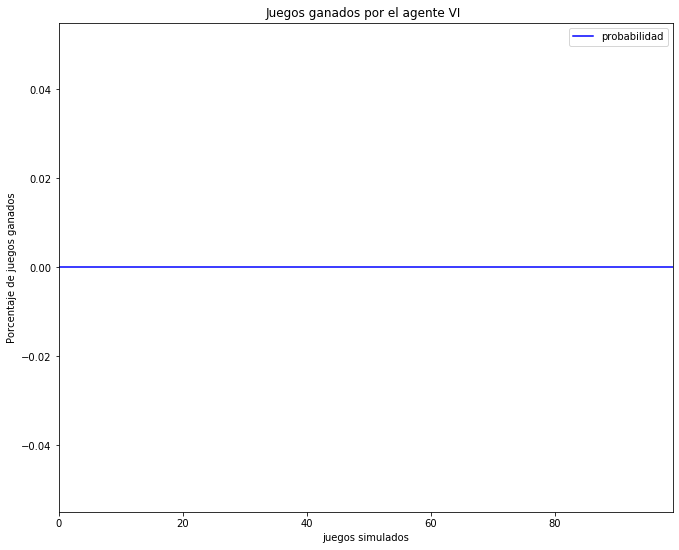

In [7]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente VI ',color='b')
plt.xlabel("juegos simulados")
plt.ylabel("Porcentaje de juegos ganados")

# Monte Carlo  

## Monte Carlo player vs random player

In [27]:
from TicTacToe.agent_mc import AgentMC as amc
from TicTacToe.human import Human as human

In [28]:
player1 = amc()

In [29]:
playerX = agent2
playerO = player1

In [30]:
prob = play_n_duels(10000, playerX, playerO)

In [31]:
vals = [(k,v) for k, v in player1.values.items() if v != 0]

In [32]:
len(vals)# +138

416

In [33]:
player1.wins

7434

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

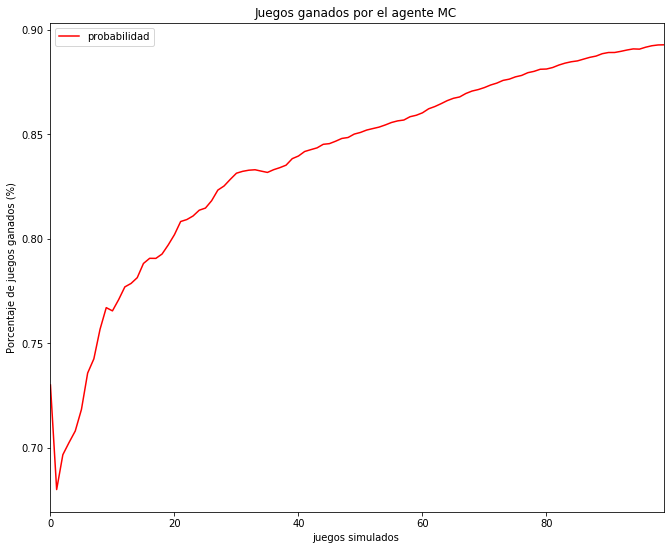

In [34]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

# Q-Learning

## Q-Learning player vs random player

In [4]:
from TicTacToe.agent_tabular_qlearning import Agent_TQL as atql

In [5]:
epsilons  = [0.01, 0.4, 0.8]
alphas = [0.001, 0.02, 0.3]
gammas = [0.02, 0.1, 0.5]
frecs = list()

In [49]:
for eps, alf , gam in zip(epsilons, alphas, gammas):
    agent5 = atql()
    agent5.epsilon = eps
    agent5.alpha = alf
    agent5.gamma = gam 
    
    playerX = agent2
    playerO = agent5
    playerX.set_role('X')
    playerO.set_role('O')
    
    frecs.append(play_n_duels(18000, playerX, playerO))

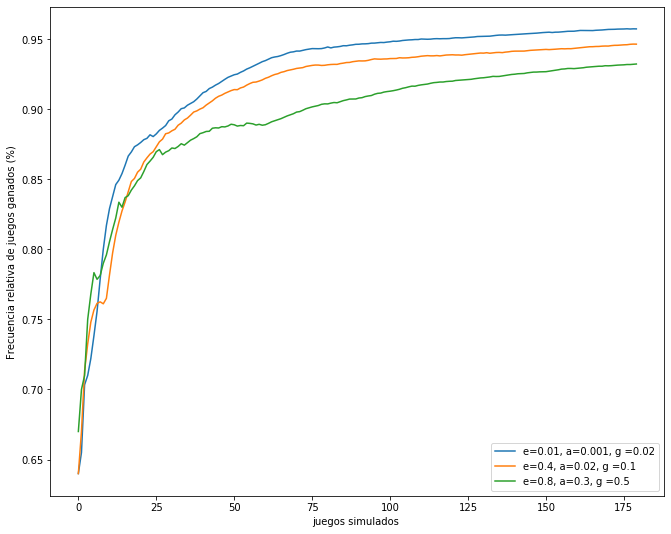

In [50]:
x = np.arange(180)
legends = list()

i = 0
for e, a ,g in zip(epsilons, alphas, gammas): 
    plt.plot(x, frecs[i])
    legends.append('e='+str(e)+', a='+str(a)+', g ='+str(g))
    i +=1
        
figsize(11, 9)
plt.legend(legends, loc='lower right')
plt.xlabel("juegos simulados ")
plt.ylabel("Frecuencia relativa de juegos ganados (%)")
plt.show()

In [6]:
agent7 = atql()
agent7.epsilon = 0.2
agent7.alpha = 0.02
agent7.gamma = 0.7


playerX = agent2
playerO = agent7
    
frec = play_n_duels(25000, playerX, playerO)

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

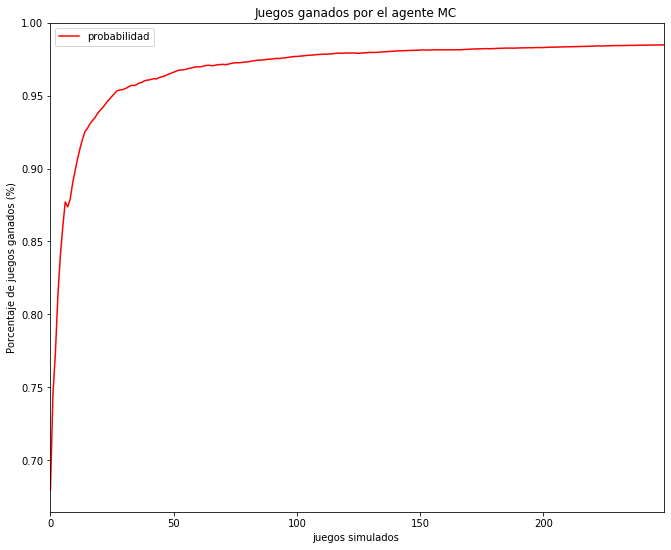

In [7]:
df = pd.DataFrame({ 'probabilidad' :frec })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

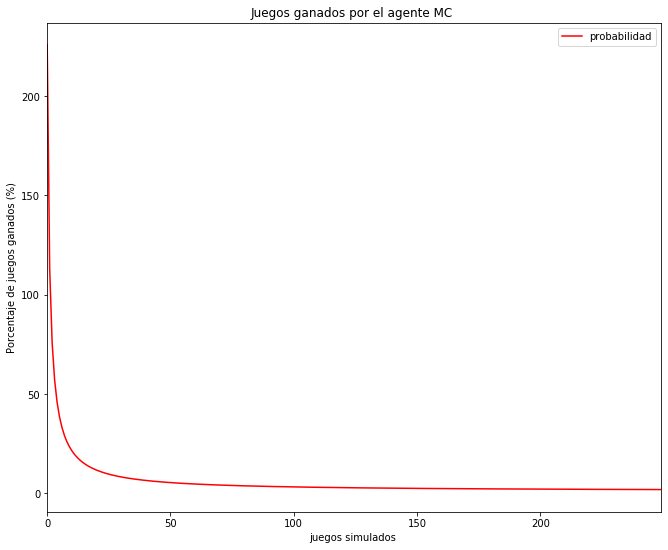

In [11]:
import copy


playerX = agent7
playerO = copy.copy(agent7)
    
frec = play_n_duels(25000, playerX, playerO)
df = pd.DataFrame({ 'probabilidad' :frec })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente MC ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

In [ ]:
#df = pd.DataFrame({ 'probabilidad' :prob })

#figsize(11, 9)
#df.plot(title='Juegos ganados por el agente Q ',color='r')


In [72]:
n = 1
frecs = list()
aux = agent5

for _ in range(n):
    agentq = atql()
    agentq.epsilon = 0.4
    agentq.alpha = 0.02
    agentq.gamma = 0.1
    
    aux.epsilon = 0.1
    playerX = aux
    playerO = agentq
    playerX.set_role('X')
    playerO.set_role('O')
    
    frecs.append(play_n_duels(18000, playerX, playerO))
    aux = agentq

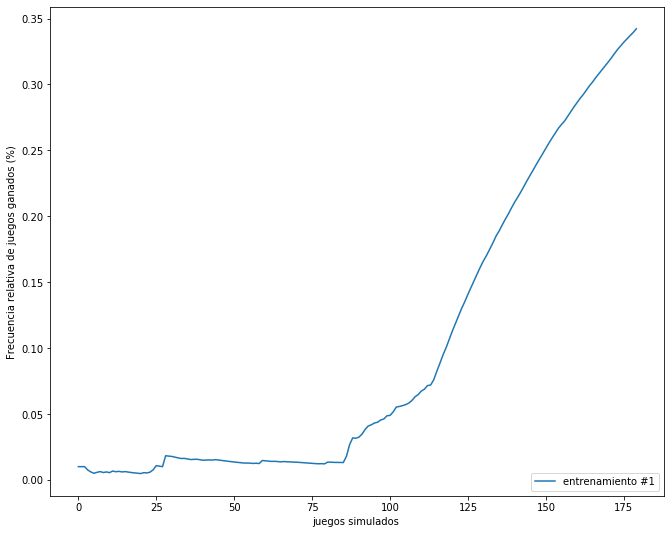

In [73]:
x = np.arange(180)
legends = list()

i = 0
for i in range(n): 
    plt.plot(x, frecs[i])
    legends.append('entrenamiento #'+str(i+1))
    
plt.legend(legends, loc='lower right')
plt.xlabel("juegos simulados ")
plt.ylabel("Frecuencia relativa de juegos ganados (%)")
plt.show()

# Q-Learning player vs human player

In [8]:
from TicTacToe.human import Human as human
human = human()

In [9]:
agent7.epsilon = 0

agent7.wins = 0


In [ ]:
play_n_duels(3, human, agent7, show=True)


              |  | 
            ----------
              |  | 
            ----------
              |  | 
        
Tu jugada es: 7

              |  | 
            ----------
              |  | 
            ----------
              | X | 
        

              |  | 
            ----------
              |  | 
            ----------
              | X | O
        
Tu jugada es: 0

             X |  | 
            ----------
              |  | 
            ----------
              | X | O
        

             X |  | 
            ----------
              | O | 
            ----------
              | X | O
        
Tu jugada es: 3

             X |  | 
            ----------
             X | O | 
            ----------
              | X | O
        

             X |  | 
            ----------
             X | O | 
            ----------
             O | X | O
        
Tu jugada es: 2

             X |  | X
            ----------
             X | O | 
            ----------
            

In [86]:
agent7.wins

953

In [71]:
duel(human, agentq, show=True)


              |  | 
            ----------
              |  | 
            ----------
              |  | 
        
Tu jugada es: 4

              |  | 
            ----------
              | X | 
            ----------
              |  | 
        

              |  | 
            ----------
              | X | 
            ----------
              |  | O
        
Tu jugada es: 2

              |  | X
            ----------
              | X | 
            ----------
              |  | O
        

              |  | X
            ----------
              | X | O
            ----------
              |  | O
        
Tu jugada es: 7

              |  | X
            ----------
              | X | O
            ----------
              | X | O
        

              | O | X
            ----------
              | X | O
            ----------
              | X | O
        
Tu jugada es: 6

              | O | X
            ----------
              | X | O
            ----------
            

1

In [70]:
agent5.wins

100

In [21]:
agent7.values

defaultdict(float,
            {(1, 1): -0.3633780469302545,
             (1, 2): -0.07643606648895902,
             (1, 3): -0.36912514252691236,
             (1, 4): 0.02116311249546518,
             (1, 5): -0.16916328194294664,
             (1, 6): -0.05310433432778645,
             (1, 7): -0.1531273798030946,
             (1, 8): 0.0019294059160781486,
             (16, 3): -0.007509255011447629,
             (16, 4): 0.0010357538571547666,
             (16, 5): -0.013399438431431817,
             (16, 6): 0.0002243405887635566,
             (16, 7): 2.1918449177855995e-05,
             (16, 8): 5.413564676387082e-05,
             (70, 4): 0.5208662001169168,
             (70, 5): 2.2514849279999992e-05,
             (70, 6): -0.0008287999999999999,
             (70, 7): 0.00034535231541468753,
             (70, 8): 0.0,
             (7, 2): 0.0,
             (151, 5): -0.9797697687995458,
             (151, 6): -0.9777342240563668,
             (151, 7): -0.9952330531049325,
   

In [22]:
agent7.state_to_matrix(agent7.key_to_state(910))

array([[1, 0, 2],
       [0, 2, 0],
       [1, 0, 0]])

# SARSA

## SARSA player vs random player

In [7]:
from TicTacToe.agent_sarsa import Agent_SARSA as asarsa

In [3]:
agent6 = asarsa()

In [9]:
playerX = agent2
playerO = agent6

In [10]:
prob = play_n_duels(15000, playerX, playerO)

In [11]:
vals = [(k,v) for k, v in agent6.values.items() if v != 0]

In [12]:
len(vals)

1226

In [13]:
agent6.wins

12790

Text(0, 0.5, 'Porcentaje de juegos ganados (%)')

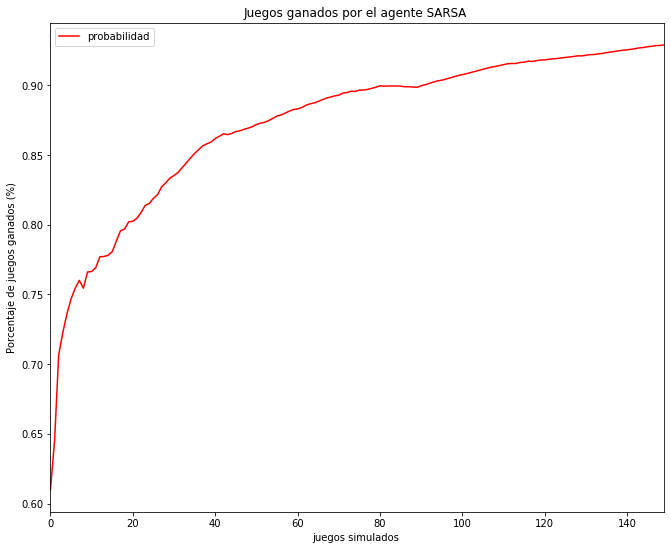

In [14]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente SARSA ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

In [15]:
playerX = agent5
playerO = agent6
prob = play_n_duels(15000, playerX, playerO)

NameError: name 'agent5' is not defined

In [ ]:
df = pd.DataFrame({ 'probabilidad' :prob })

figsize(11, 9)
df.plot(title='Juegos ganados por el agente SARSA ',color='r')
plt.xlabel("juegos simulados ")
plt.ylabel("Porcentaje de juegos ganados (%)")

In [ ]:
agent6.wins

In [ ]:
agent6.set_role('X')
duel(agent6, human, show=True)

# Campeonato

In [ ]:
from random import shuffle 

def campeonato(array):
    jugadores = array
    pasan = []
    j = 0
    shuffle(jugadores) #Revuelve los jugadores
    for _ in range(len(array)/2):
        jugadores[j].set_role('X')
        jugadores[j+1].set_role('O')
        ganador = duel(jugadores[j],jugadores[j+1],show = True)
        if ganador == 1:
            pasan.append(jugadores[j])
        else:
            pasan.append(jugadores[j+1])
        j+=2
        
    j = 0
    if len(pasan) > 1:
        campeonato(pasan)
    else:
        ganador = pasan[0]
        return ganador


In [ ]:
def campeonatos(n,puntos):
    for _ in range(n):
        i = campeonato(Agentes)
        puntos[i] = puntos[i] + 1

    return puntos

print(campeonatos(100,puntuacion))